# Frequentist vs Bayesian Statistics: on two different approaches to Parameter Estimation

When working in the fields of statistics and data science, we always find ourselves engaged in discussions on the best way to properly estimate parameters for the data that we have at hand.

In this paper, we will be discussing two main schools of thought when it comes to best practices for a thorough parameter estimation: we will delve in-depth in both the **Frequentist** and the **Bayesian approaches** to the estimation of parameters.

When we are making statistical inference on **random variables** (RVs), we are usually spurred on by a desire to understand the relationship between the RVs we have at hand and by the need to make predictions as accurate as possible when it comes to our surroundings.
A **parameter** is frequently introduced to govern said links between RVs and events, usually denoted by either **$p$** or **$θ$** (theta).

Finding this parameter, and making sure that, although **unknown**, it is as close to the truth as possible.

Our goal is to explain how these two methods deal with estimating the parameter, how they differ from one another and when and which of the two to use, based on the characteristics that the RVs take.
We proceed to introduce two examples that will show the strengths and shortcomings of both ways to practice parameter estimation:

*   For the Frequentist Approach, we used Maximum Likelihood Estimation to find a suitable parameter and develop Confidence Intervals around it, all of this on simple, balanced coin flips.
*   For the Bayesian Approach, we dealt with the idea of using a Prior Distribution in conjunction with current evidence from the data to develop a conditional distribution called Likelihood Distribution, and, lastly, another conditional distribution, this time dubbed Posterior Distribution, to plot the end-results. We once again used coin flips, but with a skewed coin instead this time around.

We chose to use coin flips as they can be easily modelled as a straightforward Binomial process, with $p$ as parameter of interest and $n$ as number of throws that we want to conduct.



In [ ]:
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

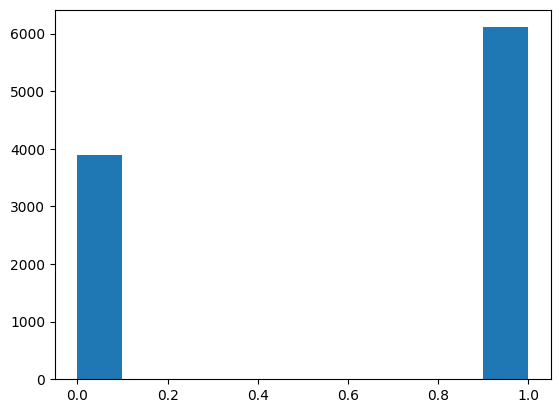

In [ ]:
np.random.seed(42) # set seed for reproducibility
# Set the probability of heads = 0.6
p = 0.6
# Flip the Coin 10000 times and observe the results
n_trials = 10000
data = stats.bernoulli.rvs(p, size = n_trials)
# plot results
plt.hist(data);

# Frequentist approach

Once we have defined our task, which is to obtain the parameter of interest $p$, the first approach we treat is the one that makes use of frequentist statistics.

This approach basically uses **the Maximum Likelihood Estimation** (MLE). It fits a model that maximizes the likelihood of having observed the observed data. In our example, the computation of the MLE for a binomial distribution is quite trivial and it is equal to the sample proportion of success.

 $MLE = \frac{\text{Number of success}}{\text{Number of trials}}$

Then, once we have an estimate of $p$, since we never know its true value, the next step is to quantify the uncertainty about $\hat{p}$. So, we must quantify its full range of potential values. That range is called "**confidence interval**" and it is easily computed for the binomial distribution.

First, we calculate the **parameter’s standard error** which is simply its standard deviation scaled by √N (the sample size).

$S.D.=\sqrt{p*(1-p)}$

$S.E.= \sqrt{\frac{p*(1-p)}{N}}$

  Then, we can **find our 95% confidence intervals** by multiplying the standard error with the 95% Z-stat, which is equal to 1.96.

$C.I. Bounds= MLE\pm 1.96*S.E.$

Let's look at what happens when we toss 10 coins. Since we've already simulated 10000 coin flips above, we can directly use the first 10 flips from the results.

In [ ]:
i = 10
results = {}
sample = data[:i]
p_estimated = np.mean(sample)
q_estimated = 1 - p_estimated
standard_error = np.sqrt(p_estimated*q_estimated)/np.sqrt(i)
ci = 1.96*standard_error
# store results in a dict
results['number_of_heads'] = sample.sum()
results['p_estimated'] = p_estimated
results['q_estimated'] = q_estimated
results['standard_error'] = standard_error
results['low'] = p_estimated - ci
results['high'] = p_estimated + ci

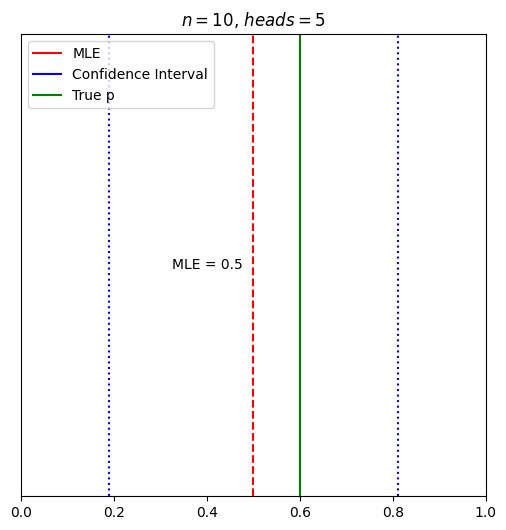

In [ ]:
import matplotlib.lines as mlines

fig, axs = plt.subplots(figsize = (6,6))

axs.axvline(results['p_estimated'], color = 'red', linestyle = "dashed")
axs.axvline(0.6, color = 'green', linestyle = "solid")
axs.axvline(results['low'], color = 'blue', linestyle='dotted')
axs.axvline(results['high'], color = 'blue', linestyle='dotted')
axs.get_yaxis().set_visible(False)
axs.title.set_text("$ n = $" + str(i) + ", $heads = $" + str(results['number_of_heads']))
axs.text(results['p_estimated'] - 0.1, 0.5, 'MLE = ' + str(np.round(results['p_estimated'], 2)),
         horizontalalignment='center', verticalalignment='center', transform=axs.transAxes)

blue_line = mlines.Line2D([], [], color='blue',
                          markersize=15, label='Confidence Interval')
red_line = mlines.Line2D([], [], color='red',
                          markersize=15, label='MLE')
green_line = mlines.Line2D([], [], color='green',
                          markersize=15, label='True p')

axs.legend(handles = [red_line, blue_line, green_line], loc=2);

Because we have observed 5 heads, the MLE is 0.5 (recall that the true value of $p$ is 0.6).

**The uncertainty is captured by the confidence intervals**, which indicate that the true value of $p$ has a 95% probability of being between ~ 0.2 and ~ 0.8.

Since the confidence intervals are **proportional to the sample size**, we can expect them to shrink as the number of coin flips increases  -  **the more data we have, the more confident we are about our predictions**.

To illustrate that, let's see what happens when we flip increasingly large amounts of coins.

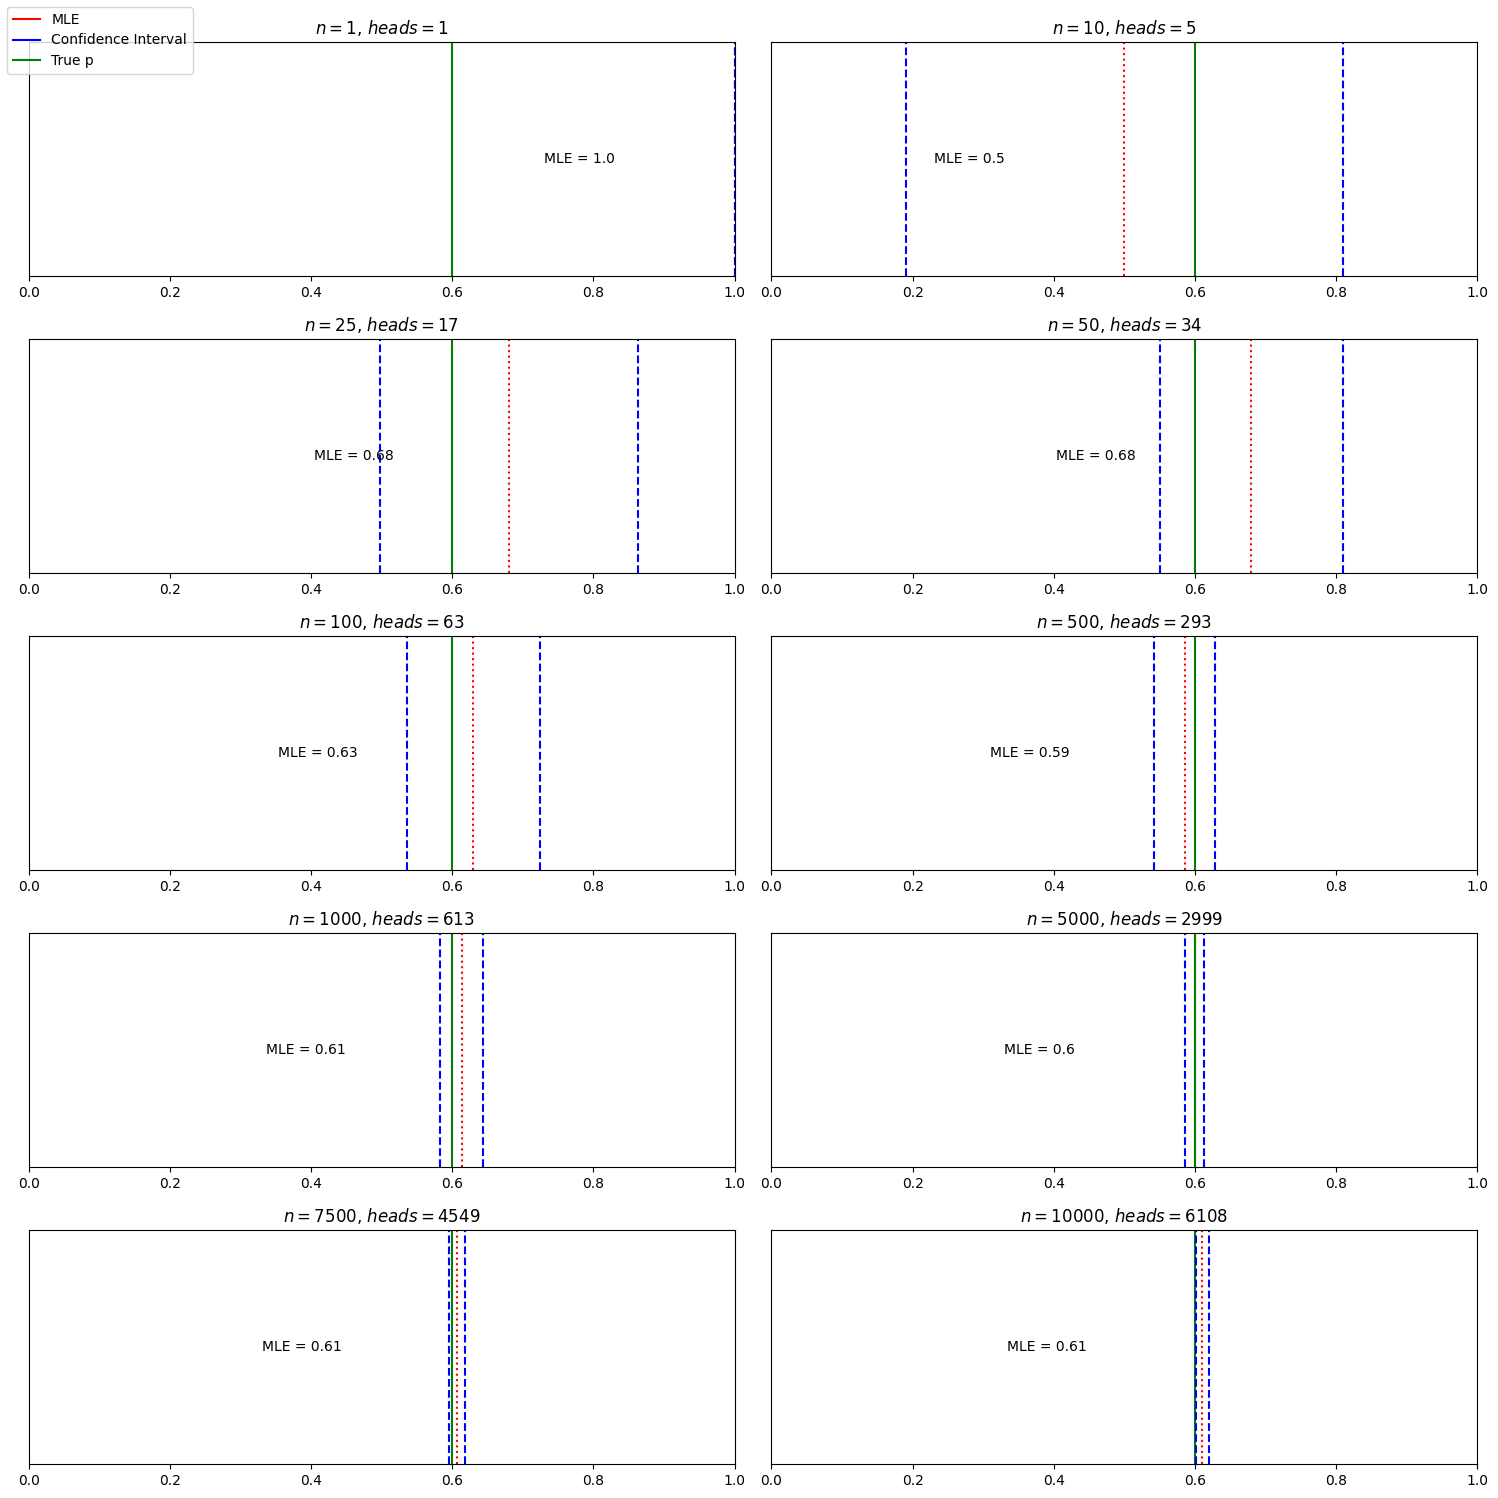

In [ ]:
full_results = []
steps = [1, 10, 25, 50, 100, 500, 1000, 5000, 7500, 10000]

for i in steps:
    results = {}
    sample = data[:i]
    p_estimated = np.mean(sample)
    q_estimated = 1 - p_estimated
    standard_error = np.sqrt(p_estimated*q_estimated)/np.sqrt(i)
    ci = 1.96*standard_error

    results['size'] = i
    results['number_of_heads'] = sample.sum()
    results['p_estimated'] = p_estimated
    results['q_estimated'] = q_estimated
    results['standard_error'] = standard_error
    results['low'] = p_estimated - ci
    results['high'] = p_estimated + ci
    full_results.append(results)

# plot figure
figs,axs = plt.subplots(5, 2, figsize=(15,15))

axes = [(0,0),(0,1), (1,0), (1,1), (2,0), (2,1), (3,0), (3,1), (4,0), (4,1)]

for i,sample in enumerate(full_results):
    axs[axes[i]].axvline(sample['p_estimated'], color = 'red', linestyle ='dotted')
    axs[axes[i]].axvline(0.6, color = 'green', linestyle = 'solid')
    axs[axes[i]].axvline(sample['low'], color = 'blue', linestyle='dashed')
    axs[axes[i]].axvline(sample['high'], color = 'blue', linestyle='dashed')
    axs[axes[i]].get_yaxis().set_visible(False)
    axs[axes[i]].title.set_text("$ n = $" + str(sample['size']) + ", $heads = $" + str(sample['number_of_heads']))
    axs[axes[i]].text(sample['p_estimated'] - 0.22, 0.5, 'MLE = ' + str(np.round(sample['p_estimated'], 2)),
    horizontalalignment='center', verticalalignment='center', transform=axs[axes[i]].transAxes)

blue_line = mlines.Line2D([], [], color='blue',
                          markersize=15, label='Confidence Interval')
red_line = mlines.Line2D([], [], color='red',
                          markersize=15, label='MLE')
green_line = mlines.Line2D([], [], color='green',
                          markersize=15, label='True p')

figs.legend(handles = [red_line, blue_line, green_line], loc=2)
figs.tight_layout();

In the plots above, we take snapshots of our results after 1 flip, 10 flips, 25 flips, and so on up to 10,000 flips. These plots give us an idea of how our estimates, and our confidence in those estimates, change as we flip the coin a repeated number of times.

When we've only flipped the coin a couple of times (say 1 to 100 times), we can see that our confidence interval is quite wide. This is because we simply haven't seen enough information to rule out the likelihood that the true probability of heads lies somewhere to the sides of our current MLE. However, as we continue to flip the coin and gather more and more evidence regarding our parameter of interest, we see our confidence interval narrowing and encapsulating the MLE. This is the **law of large numbers**: as the size of a sample increase, its parameter estimand gets closer to the true value of the whole population. This is confirmed by the knowledge that we set the true probability of heads to 0.6, and indeed our MLE estimate after just 1,000 flips is 0.61 and it does not waver after this (only the confidence interval narrows).

#Bayesian approach to parameter estimation
When performing **inference**, the task we want to achieve is that of **estimating the parameter of a distribution**. The peculiarity of the Bayesian approach stands in the fact that it merges the prior beliefs about the parameter ${\theta}$  (that takes the form of the prior distribution of ${\theta}$, $P({\theta})$) with the evidence coming from the information we gained from observing the data (that takes the form of the likelihood function $P( X | {\theta} )$) and, by doing so, this approach enables us to estimate a probability distribution for the parameter of interest. One can already see how this differs from the frequentist approach, where the estimate is a point estimate subject to an error controlled by the confidence intervals. \

Model parameters are estimated by establishing them as a distribution conditional on the data we observe.

### $P({\theta} | X )$ = $\frac{P(X|{\theta)P({\theta}})}{P(X )}$ = $\frac{P(X,{\theta})}{P(X )}$

Where :  
$P({\theta})$ is the prior distribution of our model parameter, and represents our opinion before seeing any data.\
$P(X|{\theta)}$ is the likelihood term, indicating how well the prior fits the observed data. \
$P(X )$ is the marginal distribution of the predictor variable. It represents the probability of having observed the data given all the possible values for ${\theta}$. \

But let's go one step at a time. \
In order to understand how bayesian inference works, we will introduce the theoretical part together with an application based on a sequence of coin flips. The coin flips that can result in Head(1) or Tail(0) are modelled as a Binomial random variable with parameter $p$ reprenting the probability of observing a head at each flip, $p =0.6$ . \
So we know that, when we will try to estimate the probability distribution of the unknown parameter (the main point of the Bayesian approach), we shoud observe a higher probability on $p =0.6$; but let's see what happens.



##1.  Step-Definition and encoding of our prior beliefs: the prior distribution $P({\theta})$



The first step in the bayesian workflow is to specify the prior distribution of the random variable of interest, the parameter ${\theta}$. This parameter is not based on data, it just comes from intuition, experience or beliefs. Basically what $P({\theta})$ does is to encapsulate our ideas about the probability distribution of the random variable ${\theta}$ without having seen any data.

In our example we are working with a Binomial random variable and we know that ${\theta}$ can take values in a range that goes from 0(that means that $p=0$ i.e. the probability of observing a head is 0) to 1(that means that $p=1$ i.e. the probability of observing a head is 1), so we divide the parameter space in equispaced interval of length = 0.1, and we assign a probability to each resulting parameter. Done this, we have assigned probabilities to the different parameters, which in turn are probabilities, but let's see this practically to make it even clearer.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

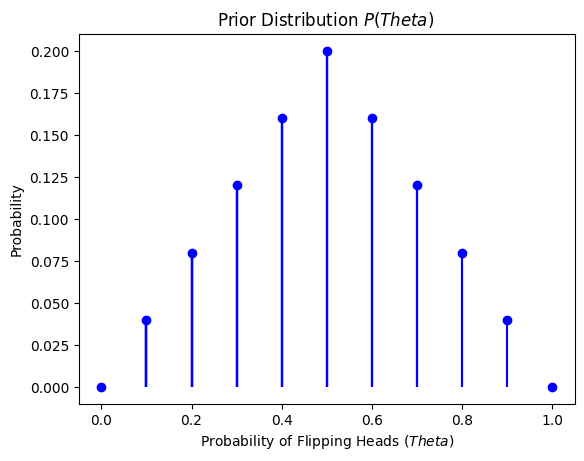

In [ ]:

probabilities = [0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.16, 0.12, 0.08, 0.04, 0]

def generate_prior_df(theta_values = np.linspace(0,1,11), theta_probabilities = probabilities):
    prior_distribution_df = pd.DataFrame(list(zip(theta_values, theta_probabilities)),
                                         columns = ("Theta", "Probability"))
    return prior_distribution_df

prior_distribution_df = generate_prior_df()
def plot_distribution(df, title: str, likelihood = False):
    plt.scatter(df.iloc[:,0], df.iloc[:,1], color = 'blue')
    for i in range(len(df)):
        plt.vlines(x = df.iloc[:i,0], color = 'blue', ymin = 0, ymax = df.iloc[:i,1])

    if likelihood:
        plt.ylabel("Likelihood")
    else:
        plt.ylabel("Probability")
    plt.xlabel("Probability of Flipping Heads (${Theta}$)")
    plt.title(title)

plot_distribution(prior_distribution_df, title = "Prior Distribution $P({Theta})$ ")

With $P({\theta})$, we encoded our prior beliefs in such the way we can observe from the plot above. From them, we can see that we assigned the higher probability to the value 0.5, i.e. our belief about $P({\theta}=0.5)=0.2$, and  $P({\theta}=0.6)=0.16$ (remember that this is the true real parameter). Now let's see what happens to the prior distribution once we actually observe data.

##2. Collection of data and extraction of information: the likelihood distribution $P(X|{\theta)}$
Once we have defined and encoded our beliefs, the next step is to collect data and incorporate it into our estimate.  Such a task is performed by means of the likelihood function: in our case, we are dealing with a sequence of $n$ tosses of a coin modelled as a binomial random variable with parameter $p=0.6$. \
The equation for the binomial likelihood is its probability mass function $L(p | n,y) = \binom{n}{y} p^y (1-p)^{n-y}$. \
The likelihood function basically answers the following question : \
Given $n$ tosses and $y$ successes(heads), what is the likelihood that $p$ is the true parameter of the distribution generating the data; or, equivalently, the likelihood function tells us how likely it is that a particular value of $p$ generated the observed data ($y$ successes in $n$ trials). \
Let's collect some data from our binomial with $p=0.6$ and  $n=[1, 10, 25, 50, 100, 500]$ .


In [ ]:
np.random.seed(42)
p = 0.6
num_tosses = [1, 10, 25, 50, 100, 500]
num_succes = []
for n in num_tosses:
    tosses = np.random.binomial(1, p, n)
    num_heads = np.sum(tosses)
    num_succes.append(num_heads)
    print(f"Number of heads in {n} tosses: {num_heads}")

Number of heads in 1 tosses: 1
Number of heads in 10 tosses: 5
Number of heads in 25 tosses: 17
Number of heads in 50 tosses: 32
Number of heads in 100 tosses: 61
Number of heads in 500 tosses: 294


<ipython-input-19-ff064bac72b9>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(likelihood_df)
<ipython-input-19-ff064bac72b9>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(likelihood_df)
<ipython-input-19-ff064bac72b9>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(likelihood_df)
<ipython-input-19-ff064bac72b9>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(likelihood_df)
<ipython-input-19-ff064bac72b9>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

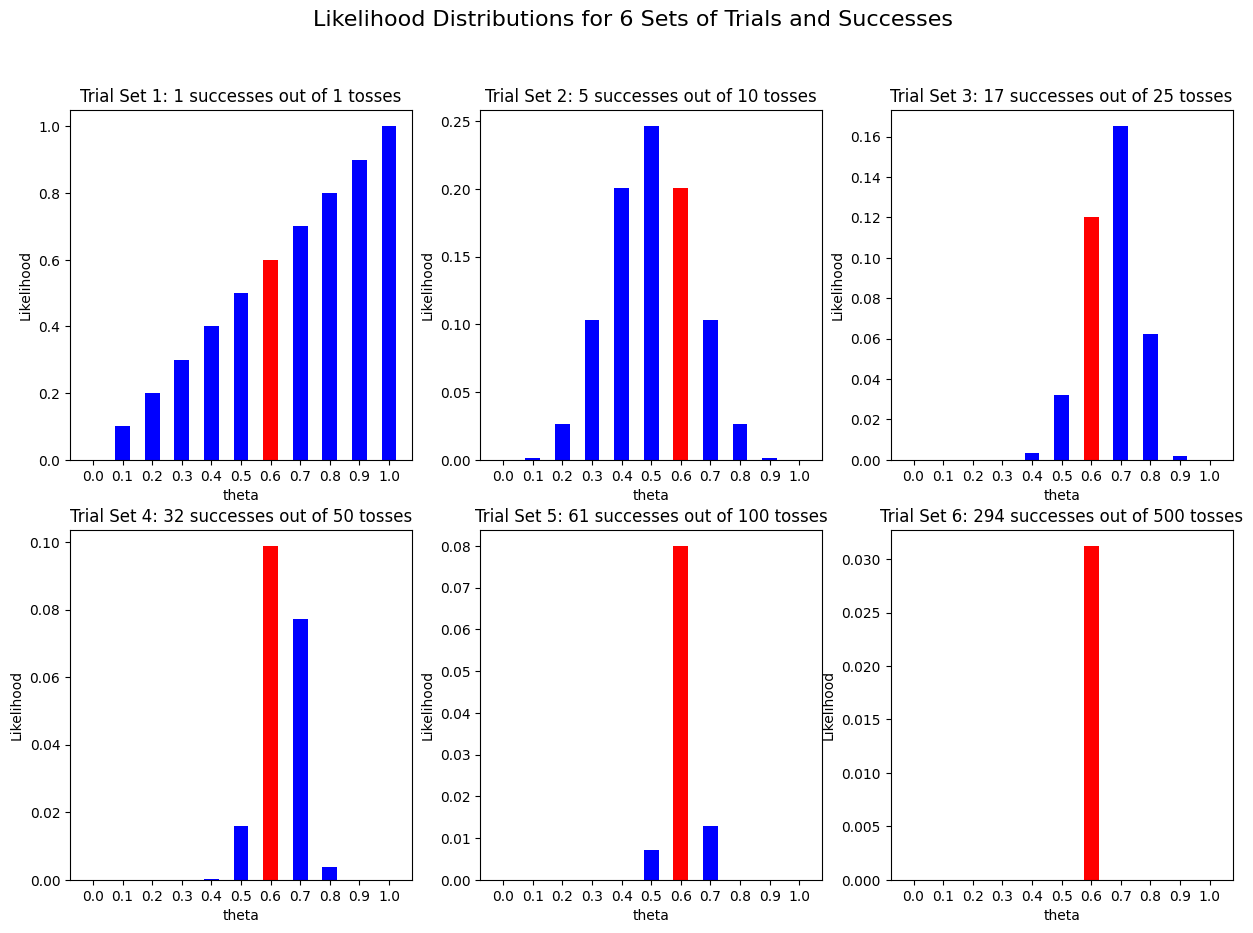

In [ ]:
np.random.seed(42)
def create_likelihood_df(n, heads, prior_df):
    likelihood_vals = stats.binom.pmf(heads, n, prior_df.Theta)
    likelihood_df = pd.DataFrame(list(zip(prior_df.Theta, likelihood_vals)), columns=('Theta', 'Likelihood'))

    return likelihood_df

num_tosses = [1, 10, 25, 50, 100, 500]
num_successes = [1, 5, 17, 32, 61, 294]

prior_thetas = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

result_df = pd.DataFrame()

for i, (n, heads) in enumerate(zip(num_tosses, num_successes)):
    prior_distribution_df = pd.DataFrame({'Theta': prior_thetas})

    likelihood_df = create_likelihood_df(n, heads, prior_distribution_df)

    likelihood_df['Trial_Set'] = i

    result_df = result_df.append(likelihood_df)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, ax in enumerate(axs.flat):
    trial_set_df = result_df[result_df['Trial_Set'] == i]
    ax.bar(trial_set_df['Theta'], trial_set_df['Likelihood'], width=0.05)
    ax.set_xticks(prior_thetas)
    ax.set_title(f'Trial Set {i+1}: {num_successes[i]} successes out of {num_tosses[i]} tosses')
    ax.set_ylabel('Likelihood')
    ax.set_xlabel('theta')
    ax.bar(trial_set_df['Theta'], trial_set_df['Likelihood'], width=0.05, color=['b'] * 6 + ['r'] + ['b'] * 4)

plt.suptitle('Likelihood Distributions for 6 Sets of Trials and Successes', fontsize=16)
plt.show()

In the above plot, we look at the likelihood distribution for 6 different sets of trials with $n=[1, 10, 25, 50, 100, 500]$ extracted from our binomial with $p=0.6$. We can observe that, given a trial, and fixed $n$ and $y$, what the likelihood function does is it assigns a relative probability to each ${\theta}$. \
It's important to note that the **likelihood distribution is not a probability distribution**, but it plays a key role into bayesian inference because it allows to update our prior beliefs about ${\theta}$ through a mechanism that assigns small likelihood values to parameters not corroborated by data, and higher values to parameters that find evidence into the data.
This brings us to the last step of the bayesian inference, the computation of the posterior distribution.

##3. Updating our prior beliefs given the empirical evidence: the posterior distribution  $P({\theta} | X )$ = $\frac{P(X|{\theta)P({\theta}})}{P(X )}$ = $\frac{P(X,{\theta})}{P(X )}$

The posterior distribution is a reflection of our beliefs about the parameter of interest, incorporating all available information. \
In the bayesian methodology, the result of the inferential procedure is expressed in the form of a probability distribution, allowing to place a value on the probability of each potential value of $p$ being correct. \
We treat the parameter as a random variable in order to capture the uncertanty about the true unknown value.\
Now we have all the ingredients to find the posterior distribution, since the numerator of the above formula is just the product between the likelihood distribution $P(X|{\theta})$ and the prior distribution of the parameter $P({\theta})$ and is equivalent to the joint distribution of the empirical evidence $X$ and the parameter ${\theta}$, while the denominator is the marginal distribution, marginalizing out ${\theta}$ of the numerator. \
In our case, the parameter space is discrete and only takes 10 values, so calculating the denominator is feasible; but, when the joint distribution at the numerator  $P(X,{\theta})$ is continuous and the random variables are not independent, the problem becomes computationally intractable.

In the following plots, keeping fixed the prior distribution, we can observe the bayesian methodology for the estimation of the posterior distribution of the parameter of interest, in action. \
It is evident that, as the number of observations increases, the metodology allows to estimate a distribution closer and closer to the real one, with the limit case in which, for a sufficient number of observations, the random variable representing the parameter of interest takes on one value: the one of the parameter generating the samples, with a probability equal to $1$, i.e. \
$P({\theta}=$real unknown $p$ | X)= $1$ and $P({\theta}\neq$real unknown $p$ | X)= $0$, which is exactly what we can observe in the trial number 6.

https://github.com/9imm7/Bayesian_inference


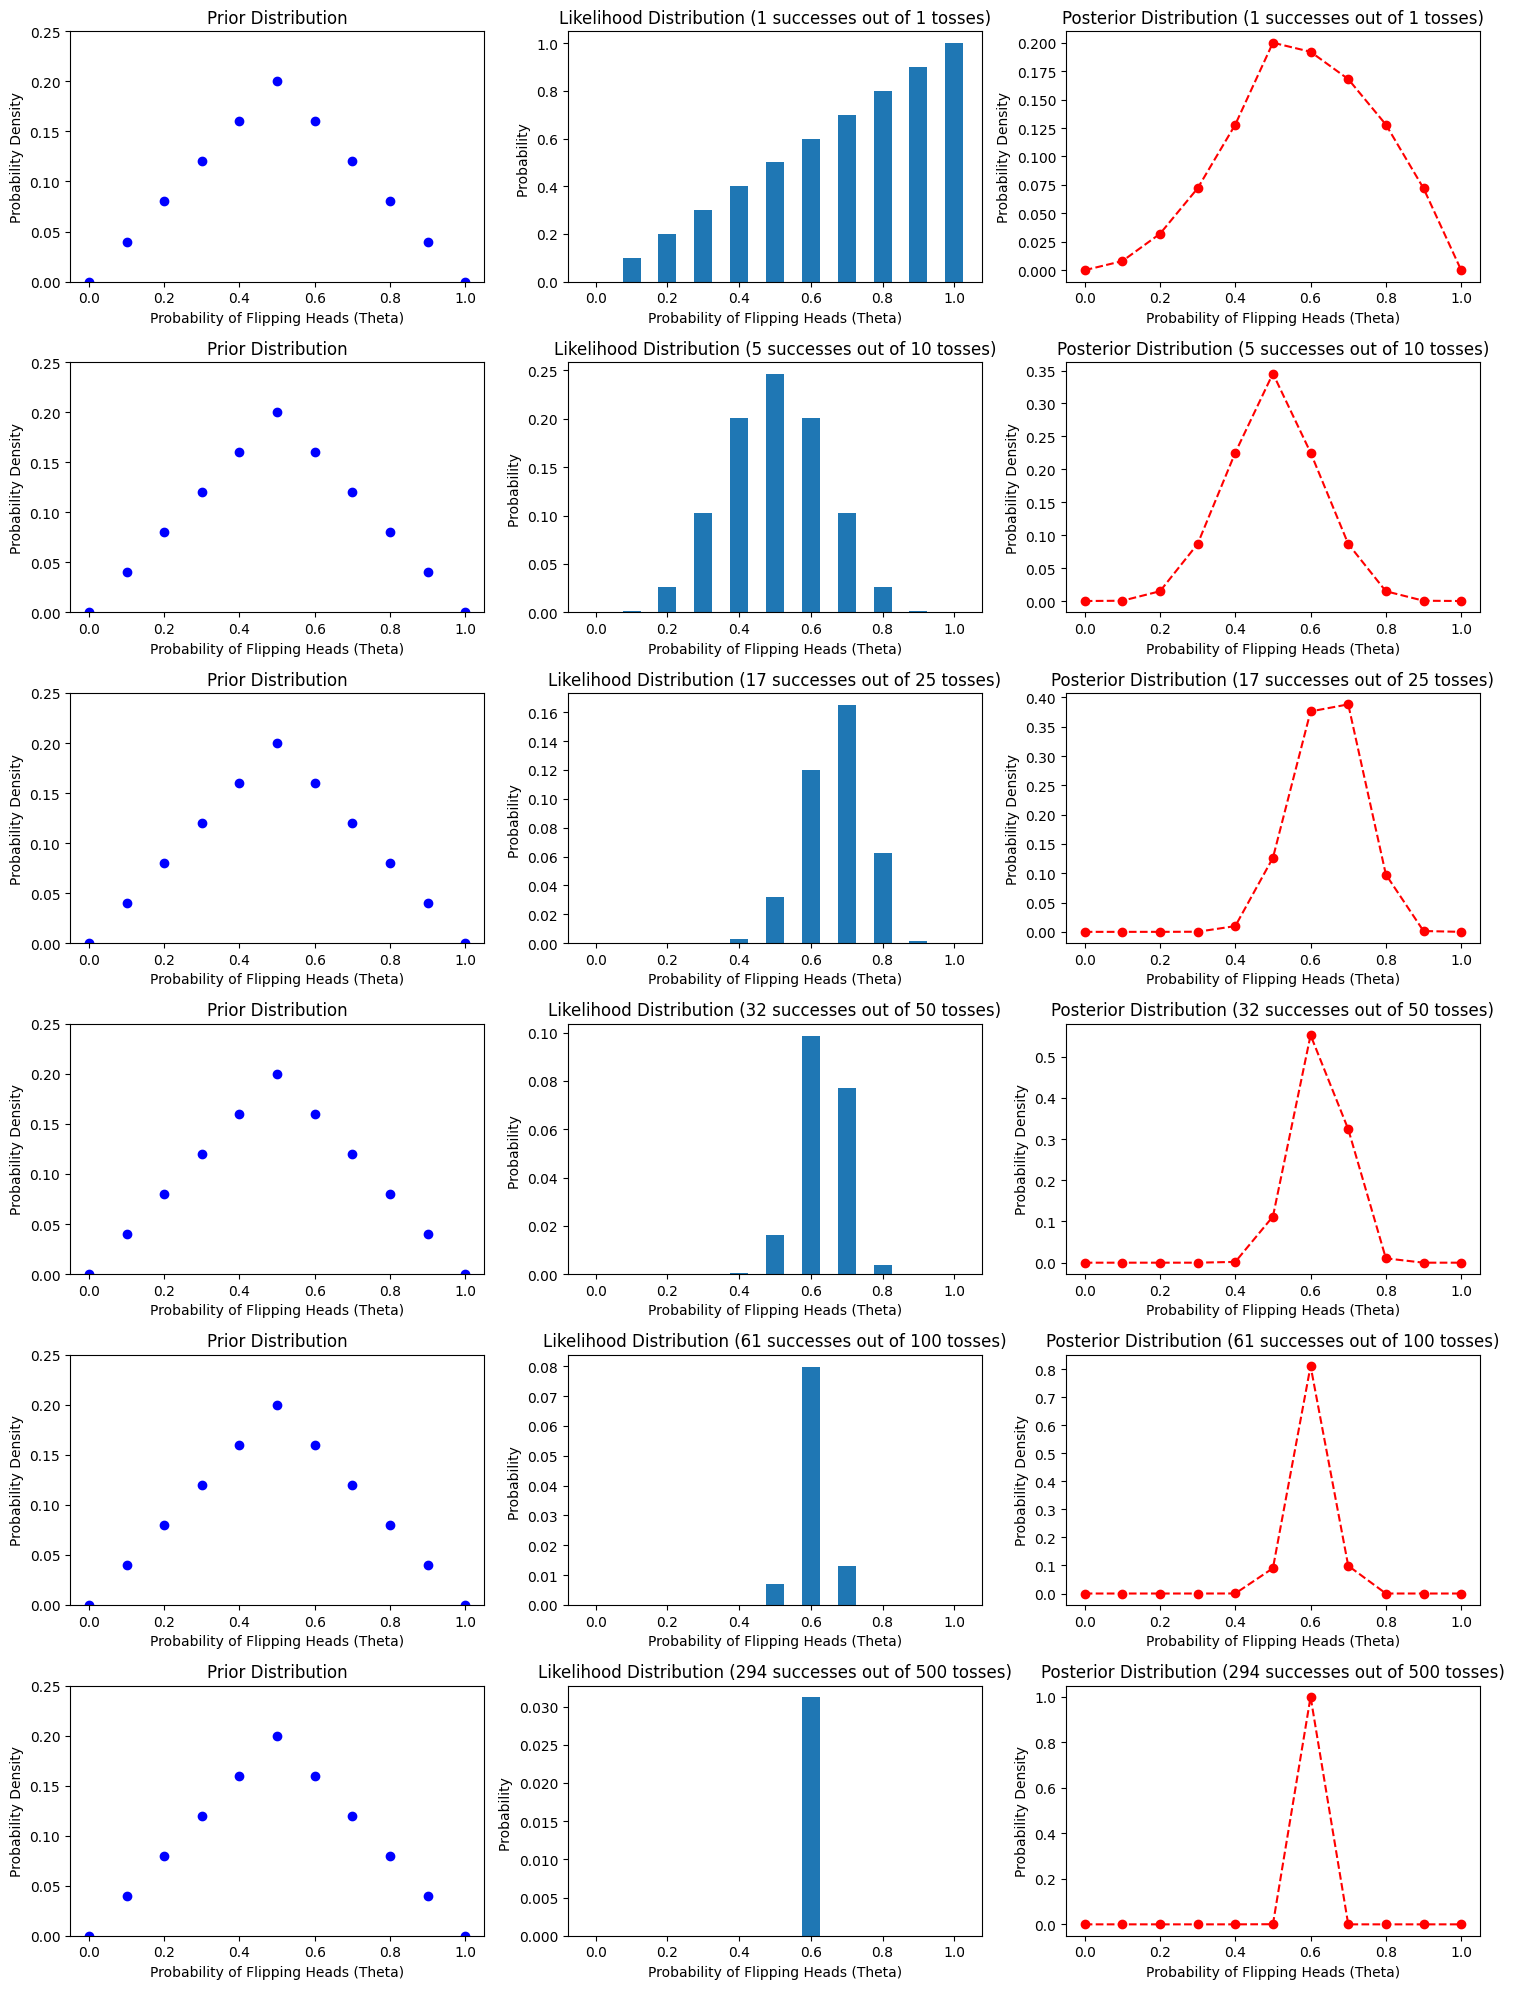

In [ ]:
np.random.seed(42)
prior_distribution = [0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.16, 0.12, 0.08, 0.04, 0]
prior_thetas = np.linspace(0, 1, len(prior_distribution))

prior_df = pd.DataFrame({
    'Theta': prior_thetas,
    'Probability': prior_distribution
})

def plot_distributions(prior_df, likelihood_df, posterior_df, num_tosses, num_successes, ax):
    ax.plot(prior_df['Theta'], prior_df['Probability'], 'bo', label='Prior')
    ax.set_ylim([0, max(prior_df['Probability']) + 0.05])
    ax.set_xlabel('Probability of Flipping Heads (Theta)')
    ax.set_ylabel('Probability Density')
    ax.set_title(f'{num_successes} Successes out of {num_tosses} Tosses')
    ax.legend()

p = 0.6

num_tosses = [1, 10, 25, 50, 100, 500]
num_successes = [1, 5, 17, 32, 61, 294]

fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))

for i, (n, heads) in enumerate(zip(num_tosses, num_successes)):

    likelihood_vals = stats.binom.pmf(heads, n, prior_thetas)
    likelihood_df = pd.DataFrame({
        'Theta': prior_thetas,
        'Likelihood': likelihood_vals
    })


    posterior_vals = prior_distribution * likelihood_vals
    posterior_vals /= np.sum(posterior_vals)
    posterior_df = pd.DataFrame({
        'Theta': prior_thetas,
        'Probability': posterior_vals
    })


    axs[i, 0].scatter(prior_df['Theta'], prior_df['Probability'], c='b', marker='o')
    axs[i, 0].set_ylim([0, max(prior_df['Probability']) + 0.05])
    axs[i, 0].set_xlabel('Probability of Flipping Heads (Theta)')
    axs[i, 0].set_ylabel('Probability Density')
    axs[i, 0].set_title('Prior Distribution')

    axs[i, 1].bar(likelihood_df['Theta'], likelihood_df['Likelihood'], width=0.05)
    axs[i, 1].set_title(f'Likelihood Distribution ({num_successes[i]} successes out of {num_tosses[i]} tosses)')
    axs[i, 1].set_xlabel('Probability of Flipping Heads (Theta)')
    axs[i, 1].set_ylabel('Probability ')

    axs[i, 2].plot(posterior_df['Theta'], posterior_df['Probability'], 'ro--')
    axs[i, 2].set_title(f'Posterior Distribution ({num_successes[i]} successes out of {num_tosses[i]} tosses)')
    axs[i, 2].set_xlabel('Probability of Flipping Heads (Theta)')
    axs[i, 2].set_ylabel('Probability Density')

plt.tight_layout()
plt.show()


But, of course, instead of keeping fixed the prior distribution and just looking at what happens when we apply the methodology for different sample size i.e. different number of tosses, we could ask ourselves what could happen if we changed approach and considered a dynamic update procedure.
By that, we mean to fix a prior distribution, then observing a sample of a fixed size (let's say $n$) and, given the likelihood distribution, updating the prior distribution and obtaining the posterior distribution. \
Instead, we now consider the posterior distribution of this iteration as the prior distribution of the next iteration and we observe the effect on our "new" prior distribution of $n$ new observations extracted from the same population for as many iterations as we want. \
Here follows just that: we can observe some plots in which, starting from the same prior distribution as before, we continously updated the prior distribution using sets of $n$=5 observations.

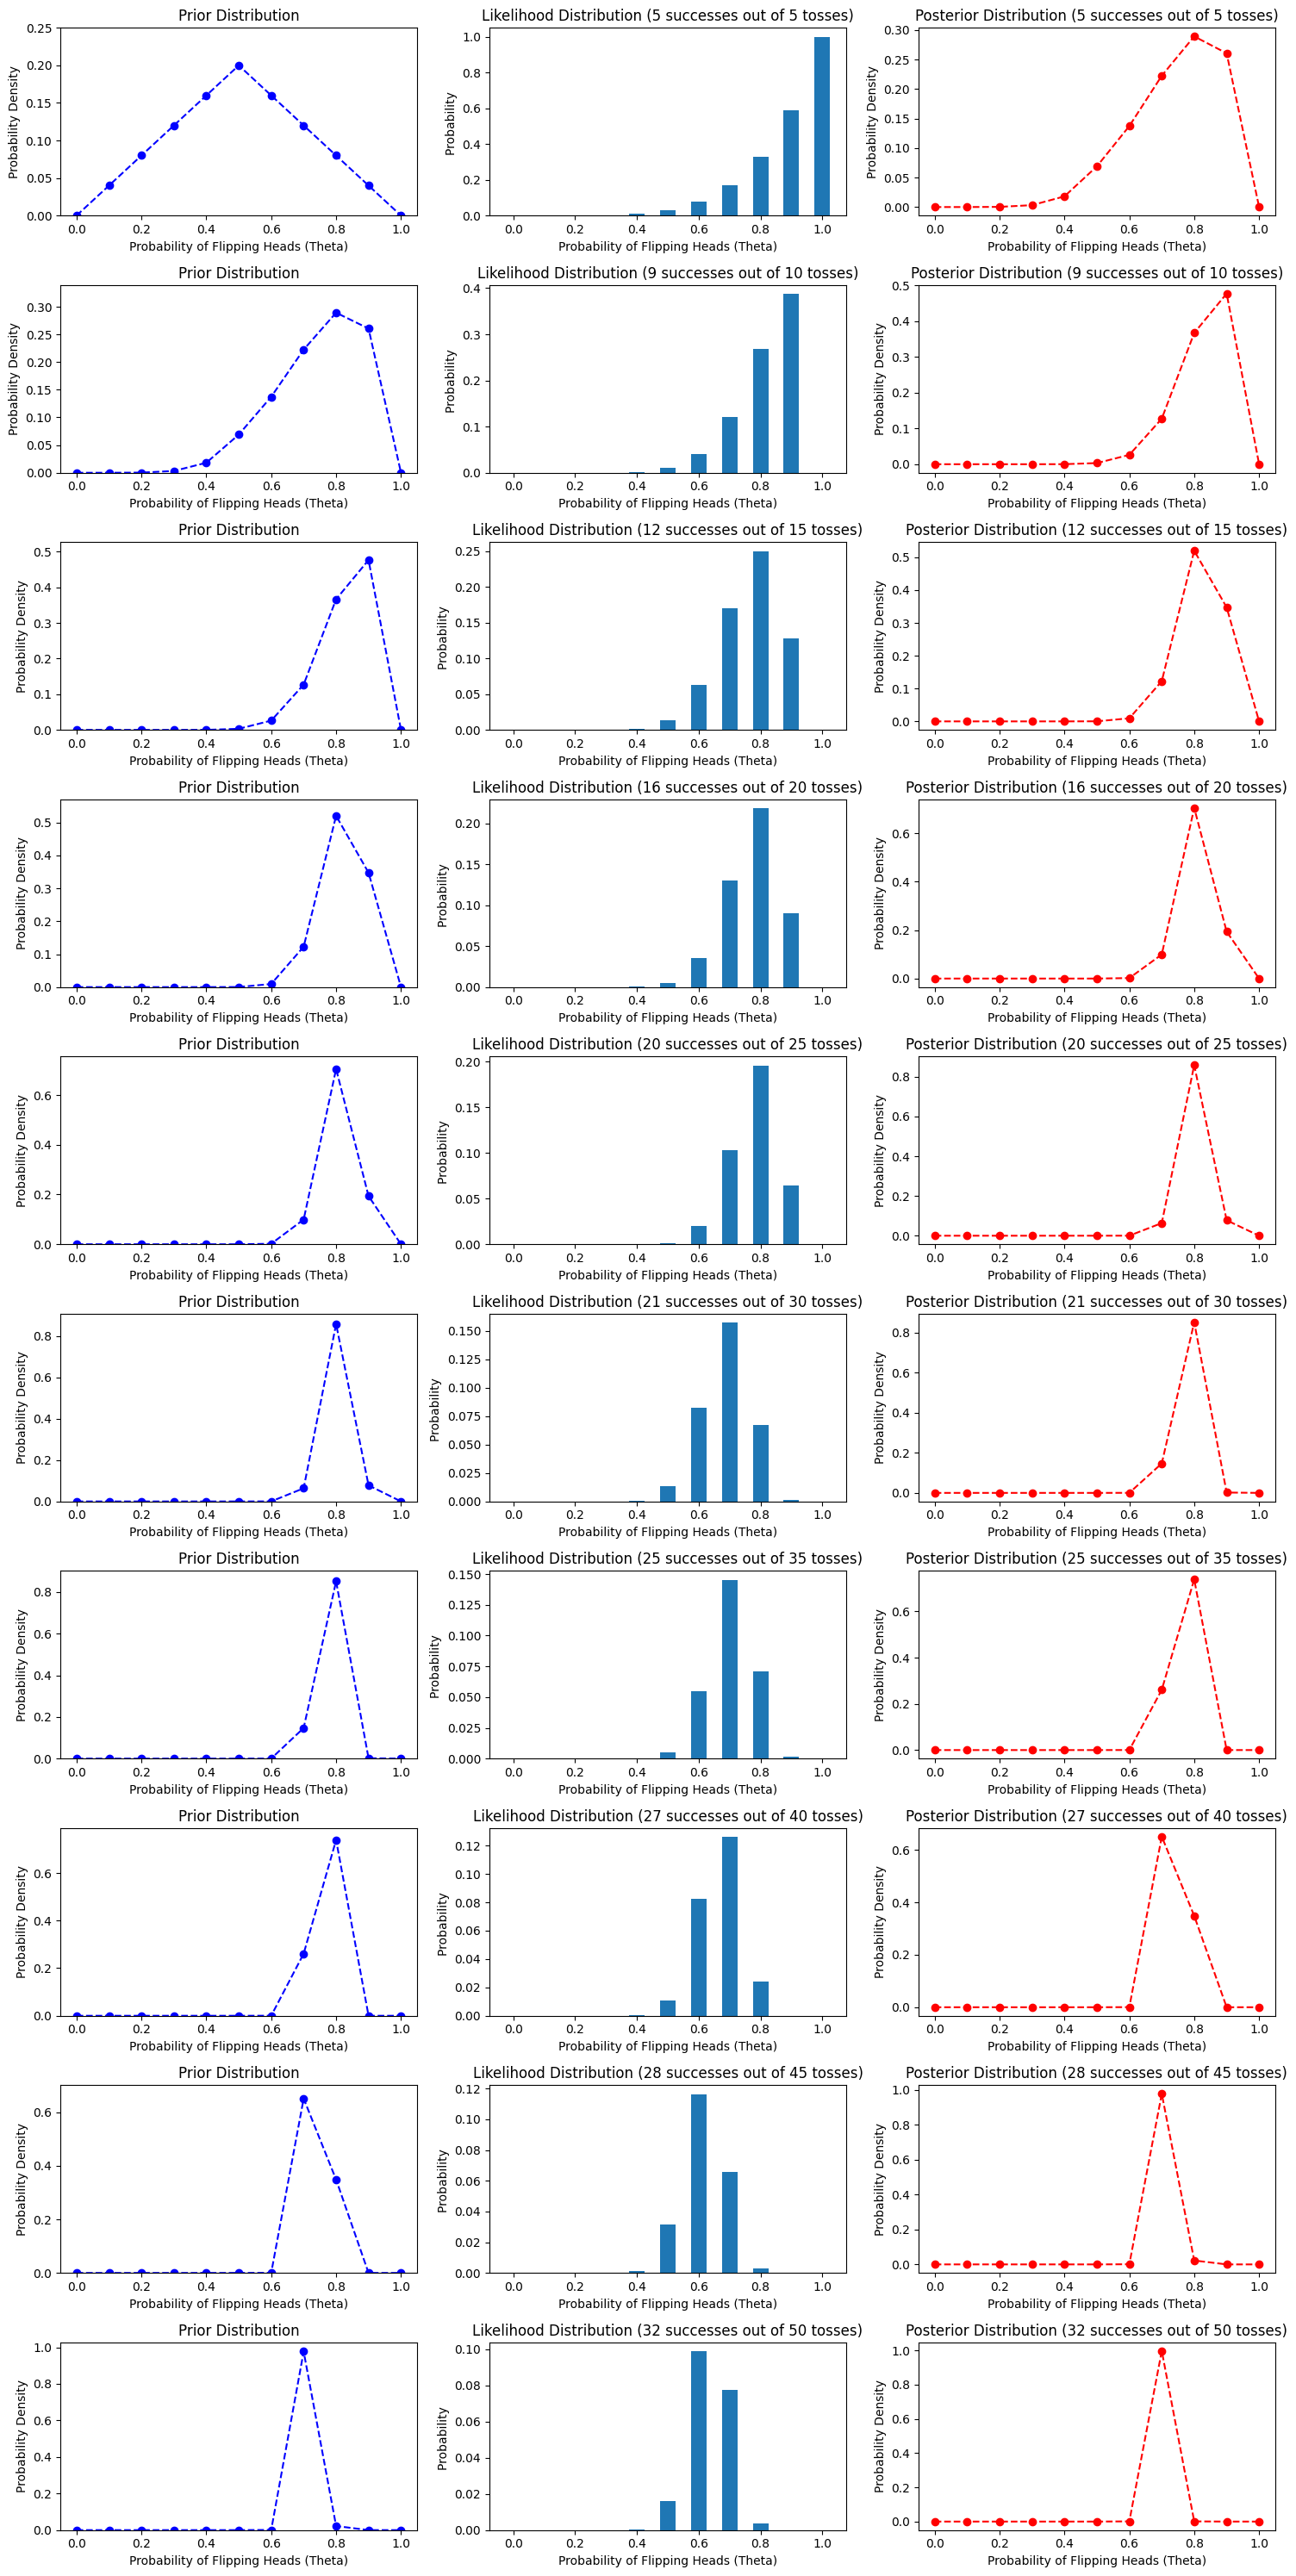

In [ ]:
fig, axs = plt.subplots(nrows=10, ncols=3, figsize=(15, 30))

prior_distribution = [0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.16, 0.12, 0.08, 0.04, 0]
prior_thetas = np.linspace(0, 1, len(prior_distribution))
prior_df = pd.DataFrame({
    'Theta': prior_thetas,
    'Probability': prior_distribution
})

p = 0.6

for i in range(10):
    if i == 0:
        n = 0
        heads = 0
        prior_df = pd.DataFrame({
            'Theta': prior_thetas,
            'Probability': prior_distribution
        })
    else:
        prior_distribution = posterior_df['Probability']
        prior_thetas = posterior_df['Theta']
        prior_df = pd.DataFrame({
            'Theta': prior_thetas,
            'Probability': prior_distribution
        })

    n = n + 5
    heads = heads + np.random.binomial(5, p)

    likelihood_vals = stats.binom.pmf(heads, n, prior_thetas)
    likelihood_df = pd.DataFrame({
        'Theta': prior_thetas,
        'Likelihood': likelihood_vals
    })

    posterior_vals = prior_distribution * likelihood_vals
    posterior_vals /= np.sum(posterior_vals)
    posterior_df = pd.DataFrame({
        'Theta': prior_thetas,
        'Probability': posterior_vals
    })

    axs[i, 0].plot(prior_df['Theta'], prior_df['Probability'], 'bo--', label='Prior')
    axs[i, 0].set_ylim([0, max(prior_df['Probability']) + 0.05])
    axs[i, 0].set_xlabel('Probability of Flipping Heads (Theta)')
    axs[i, 0].set_ylabel('Probability Density')
    axs[i, 0].set_title('Prior Distribution')

    axs[i, 1].bar(likelihood_df['Theta'], likelihood_df['Likelihood'], width=0.05)
    axs[i, 1].set_title(f'Likelihood Distribution ({heads} successes out of {n} tosses)')
    axs[i, 1].set_xlabel('Probability of Flipping Heads (Theta)')
    axs[i, 1].set_ylabel('Probability ')

    axs[i, 2].plot(posterior_df['Theta'], posterior_df['Probability'], 'ro--')
    axs[i, 2].set_title(f'Posterior Distribution ({heads} successes out of {n} tosses)')
    axs[i, 2].set_xlabel('Probability of Flipping Heads (Theta)')
    axs[i, 2].set_ylabel('Probability Density')

plt.tight_layout()
plt.show()


## Conclusions



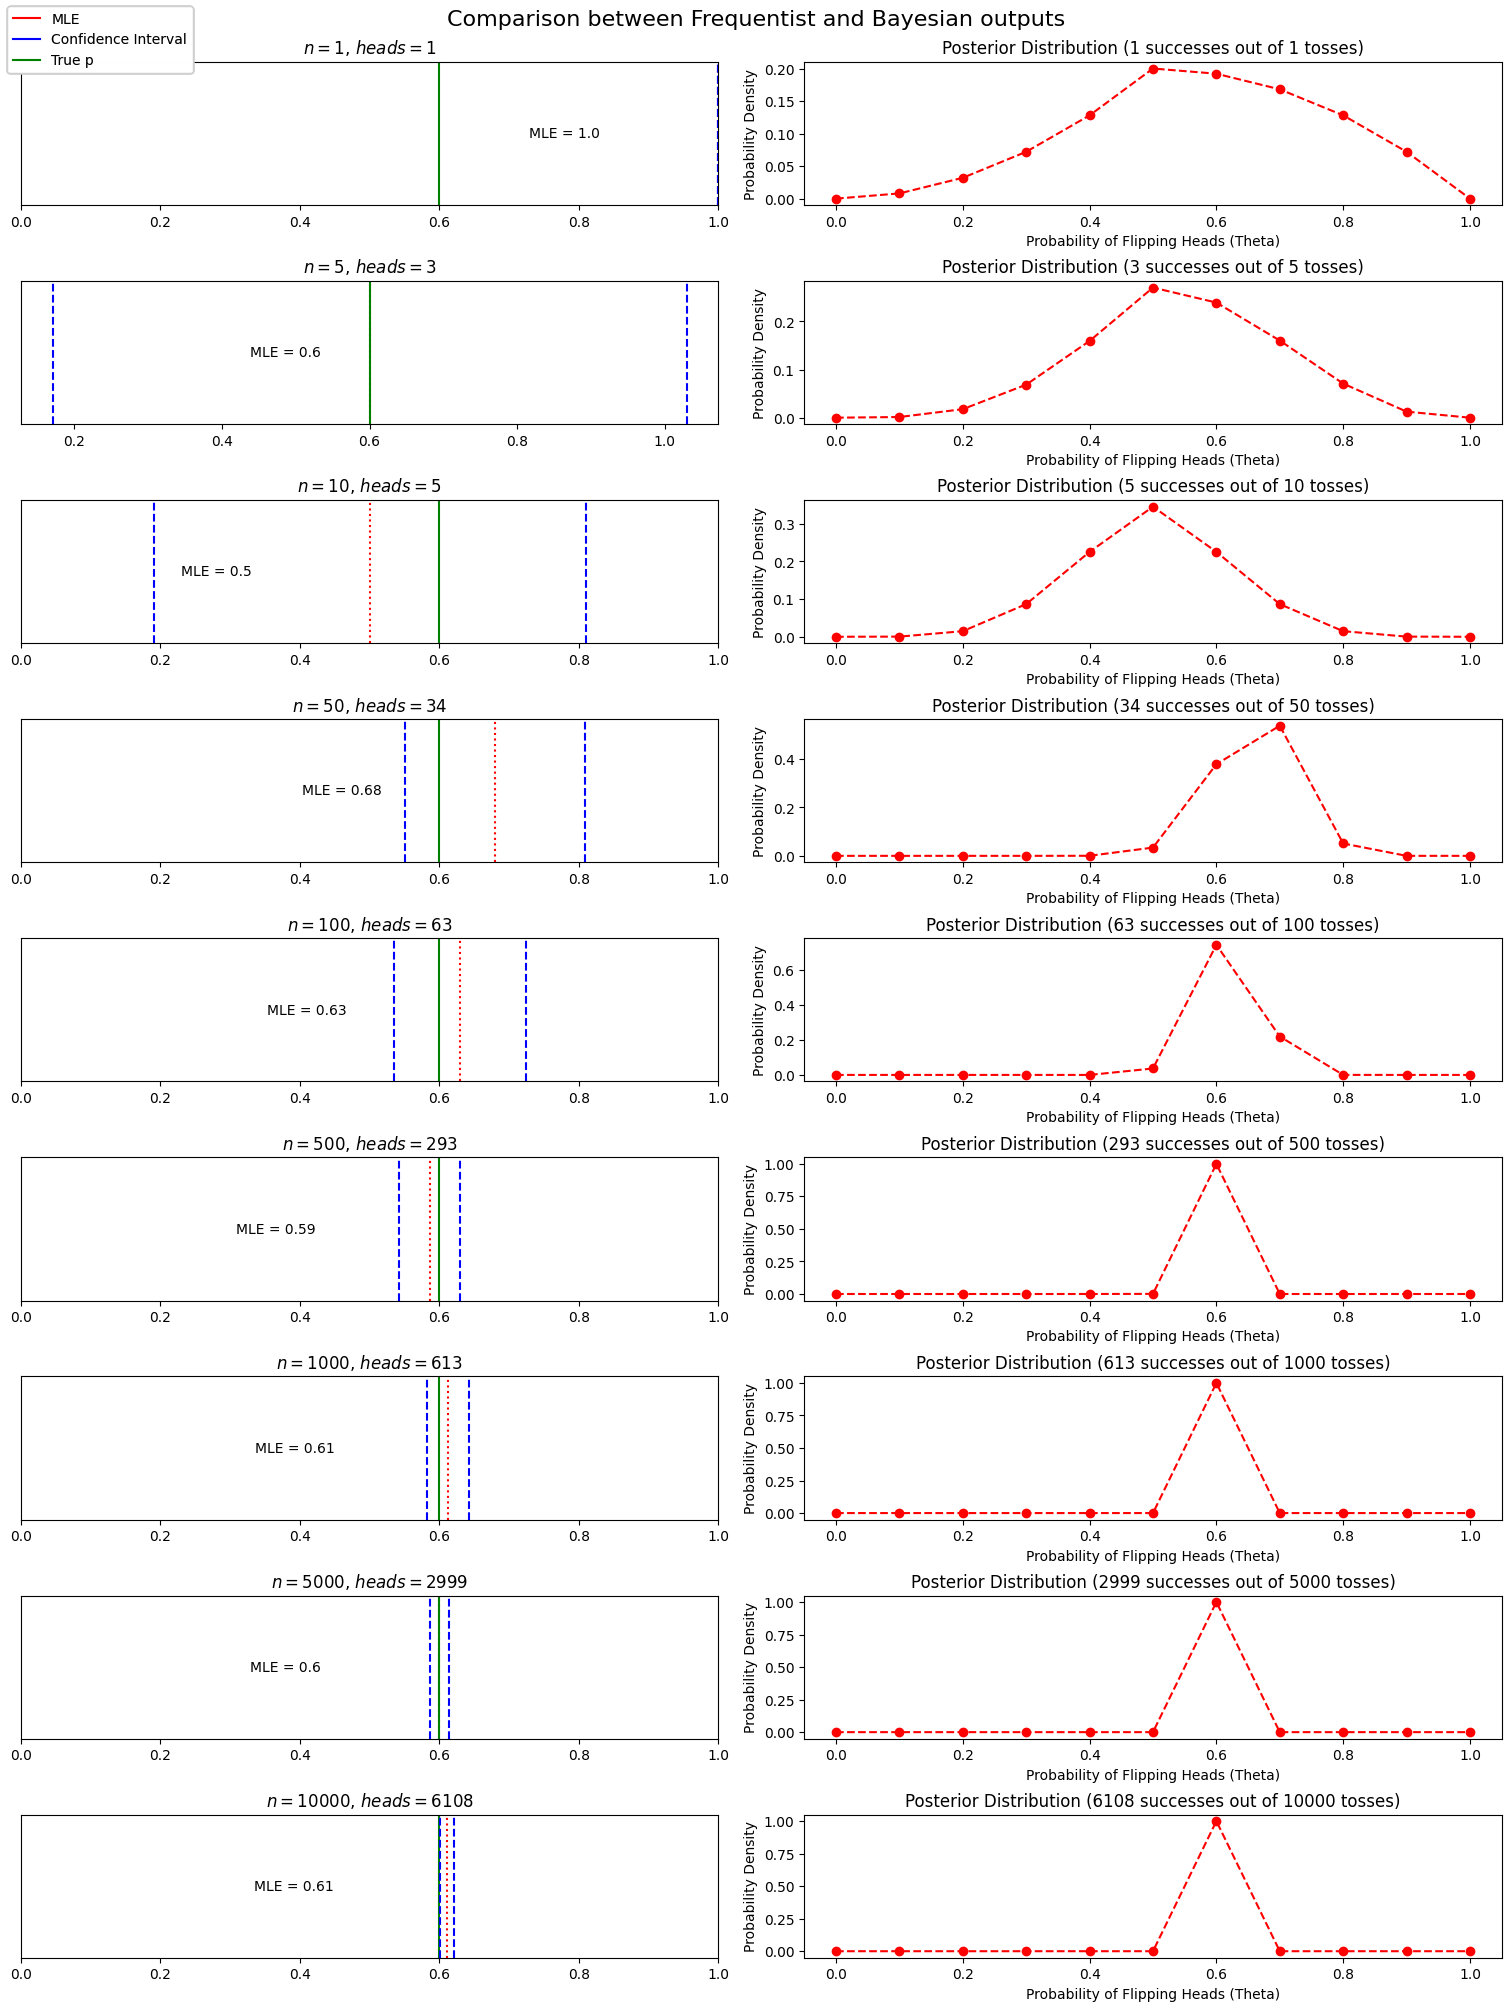

In [ ]:
figs,axs = plt.subplots(9, 2, figsize=(15,20), constrained_layout=True)
np.random.seed(42)

prior_distribution = [0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.16, 0.12, 0.08, 0.04, 0]
prior_thetas = np.linspace(0, 1, len(prior_distribution))

for j, i in enumerate([1,5,10,50,100,500,1000,5000,10000]):
  results = {}
  sample = data[:i]
  p_estimated = np.mean(sample)
  q_estimated = 1 - p_estimated
  standard_error = np.sqrt(p_estimated*q_estimated)/np.sqrt(i)
  ci = 1.96*standard_error

  results['size'] = i
  results['number_of_heads'] = sample.sum()
  results['p_estimated'] = p_estimated
  results['q_estimated'] = q_estimated
  results['standard_error'] = standard_error
  results['low'] = p_estimated - ci
  results['high'] = p_estimated + ci


  axs[(j,0)].axvline(results['p_estimated'], color = 'red', linestyle ='dotted')
  axs[(j,0)].axvline(0.6, color = 'green', linestyle = 'solid')
  axs[(j,0)].axvline(results['low'], color = 'blue', linestyle='dashed')
  axs[(j,0)].axvline(results['high'], color = 'blue', linestyle='dashed')
  axs[(j,0)].get_yaxis().set_visible(False)
  axs[(j,0)].title.set_text("$ n = $" + str(results['size']) + ", $heads = $" + str(results['number_of_heads']))
  axs[(j,0)].text(results['p_estimated'] - 0.22, 0.5, 'MLE = ' + str(np.round(results['p_estimated'], 2)),
  horizontalalignment='center', verticalalignment='center', transform=axs[(j,0)].transAxes)

  blue_line = mlines.Line2D([], [], color='blue',
                          markersize=15, label='Confidence Interval')
  red_line = mlines.Line2D([], [], color='red',
                          markersize=15, label='MLE')
  green_line = mlines.Line2D([], [], color='green',
                          markersize=15, label='True p')

  figs.legend(handles = [red_line, blue_line, green_line], loc=2)

  prior_df = pd.DataFrame({
    'Theta': prior_thetas,
    'Probability': prior_distribution})

  likelihood_vals = stats.binom.pmf(results['number_of_heads'], i, prior_thetas)
  likelihood_df = pd.DataFrame({
        'Theta': prior_thetas,
        'Likelihood': likelihood_vals})
  posterior_vals = prior_distribution * likelihood_vals
  posterior_vals /= np.sum(posterior_vals)
  posterior_df = pd.DataFrame({
        'Theta': prior_thetas,
        'Probability': posterior_vals})
  axs[(j,1)].plot(posterior_df['Theta'], posterior_df['Probability'], 'ro--')
  axs[(j,1)].set_title(f'Posterior Distribution ({sample.sum()} successes out of {i} tosses)')
  axs[(j,1)].set_xlabel('Probability of Flipping Heads (Theta)')
  axs[(j,1)].set_ylabel('Probability Density')
plt.suptitle('Comparison between Frequentist and Bayesian outputs', fontsize=16)
plt.show()